## Probeweise Durchführung einer Teststatistik für Gesamtlängen in Tokens pro Gedicht

1. Hypothesen
- **Nullhypothese (H0)**: Es gibt zwischen den beiden Subsamples (M/W) **keinen signifikanten Unterschied** in der Gesamtlänge der Gedichte in Tokens.
- **Alternativhypothese (H1)**: Es gibt zwischen den beiden Subsamples (M/W) **einen signifikanten Unterschied** in der Gesamtlänge der Gedichte in Tokens.
    - &rarr; "Männer schreiben längere Gedichte (= mit mehr Wörtern) als Frauen. Frauen schreiben im Verlgeich zu Männern kürzere Gedichte."

In [24]:
import os
import json
import statistics
import numpy as np
import spacy

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind, shapiro, mannwhitneyu

nlp = spacy.load("de_core_news_md")

2. Daten vorbereiten

Für jedes Teilkorpus:
- Dictionary mit Gedichttitel als Key
- und Anzahl der Tokens im Gedicht

In [25]:
# Funktion zum Zählen der Tokens in einem Gedichtstext
def count_tokens(poem_text):
    doc = nlp(poem_text)
    return len(doc)

def tokens_per_poem(folder_path: str):
    # Dictionary zur Speicherung der Ergebnisse
    poem_lenghts = {}
    # Durchlaufe die JSON-Dateien im Ordner
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r', encoding='utf8') as file:
                poem_data = json.load(file)
                # Extrahiere den Gedichtstext aus der json-Datei
                if poem_data['poem'] and poem_data['author_birth'] != "0":
                    poem_lines = [line_data['text'] for line_data in poem_data['poem'].values()]
                    poem_text = ' '.join(poem_lines)
                    # Zähle die Tokens im Gedichtstext
                    num_tokens = count_tokens(poem_text)
                    # Füge das Ergebnis zum Dictionary hinzu
                    poem_lenghts[poem_data['title']] = num_tokens
    return poem_lenghts

In [26]:
poems_and_lengths_m = tokens_per_poem('corpus_finished_m')
print(poems_and_lengths_m)

{'00-hera-mit-den-weissen-armen-kauft-am-flohmarkt-antiquitaeten-ein-16612': 137, '12-ein-zahlengedicht-826': 371, '1886-53': 547, '2-uhr-16-gedicht-5230': 168, '21-uhr-39-gedicht-5233': 92, '3-artemis-16610': 418, '350': 79, '6-5-1996-233': 565, '6-zeus-kronion-16611': 695, '7-tage-der-cuba-bar-11579': 154, '7077': 62, '8-11173': 189, '8-6588': 38, 'abc-3222': 58, 'abc-683': 307, 'abendnachrichten-342': 57, 'abendrot-5350': 8, 'abends-3376': 86, 'abschied-mit-zigarren-8254': 186, 'abschied-von-gomera-5163': 219, 'abschrankung-isst-wegweiser-188': 57, 'ach-2431': 163, 'ach-der-tisch-brzur-poesie-des-poedu-153': 923, 'ach-kinder-16431': 77, 'ach-waer-ein-ich-145': 117, 'achterbahntraeume-20': 61, 'actaeon-2-111': 166, 'actaeon-3-113': 160, 'actaeon-4-114': 122, 'actaeon-5-115': 121, 'admitische-zaesuren-993': 208, 'adriaen-brouwer-1605-1638-15593': 142, 'aelteres-paar-3691': 94, 'aineias-2568': 164, 'al-kuds-2576': 66, 'al-qahira-2569': 43, 'alexanderschlacht-11185': 127, 'alexandria-i-

In [27]:
poems_and_lengths_w = tokens_per_poem('corpus_finished_w')
print(poems_and_lengths_w)

{'21-september-5717': 58, '23-september-5718': 68, '4-januar-5721': 51, '5-januar-5722': 51, '6-januar-5723': 55, '7-november-5719': 70, '8-november-5720': 66, 'ab-und-zuckert-es-15426': 136, 'abloese-12371': 146, 'about-horst-janssen-gegen-verfluchtes-chaos-geheiligte-ordnung-13681': 106, 'about-horst-janssen-storytelling-13683': 118, 'about-horst-janssen-weisst-du-weisch-13682': 117, 'about-neo-rauch-periphere-zuneigung-zu-new-york-13679': 103, 'about-neo-rauch-re-13680': 123, 'abschied-1451': 355, 'abschiedslied-4292': 39, 'abstossung-kippeln-tasten-kontakt-10154': 103, 'abwendig-haengt-der-mond-im-dunst-1284': 135, 'abwesenheiten-i-i-am-sitting-room-12795': 53, 'abwesenheiten-x-batjuskov-12799': 87, 'ahasver-1279': 407, 'alemannische-mangos-15731': 159, 'alle-fandens-schad-12732': 180, 'alle-tage-265': 107, 'alle-wetter-ein-weisser-schimmel-10163': 271, 'alles-wird-immer-noch-da-sein-7818': 88, 'als-ich-bei-ihm-war-2629': 105, 'als-ich-noch-hoeren-konnte-15717': 169, 'als-mir-die-s

3. Deskriptive Statistik
- Durchschnitt (Mittelwert)
- Standardabweichung der Verslängen für jedes Subsample

In [28]:
def calculate_statistics(poem_lengths):
    # Berechnung des Durchschnitts (Mittelwert)
    average = statistics.mean(poem_lengths)
    
    # Berechnung der Standardabweichung
    std_deviation = statistics.stdev(poem_lengths)
    
    return average, std_deviation

# Extrahiere die Gedichtlängen aus dem Dictionary
poem_lengths_m = list({key: value for key, value in poems_and_lengths_m.items() if value != 0}.values())
poem_lengths_w = list({key: value for key, value in poems_and_lengths_w.items() if value != 0}.values())

# Berechne Durchschnitt und Standardabweichung
average_length_m, std_dev_m = calculate_statistics(poem_lengths_m)
average_length_w, std_dev_w = calculate_statistics(poem_lengths_w)

# Ausgabe der Ergebnisse
print("Durchschnittliche Gedichtlänge Männer:", average_length_m)
print("Durchschnittliche Gedichtlänge Frauen:", average_length_w)
print("Standardabweichung der Gedichtlänge Männer:", std_dev_m)
print("Standardabweichung der Gedichtlänge Frauen:", std_dev_w)
print("Stichprobengröße für männliche Autoren:", len(poem_lengths_m))
print("Stichprobengröße für weibliche Autoren:", len(poem_lengths_w))

Durchschnittliche Gedichtlänge Männer: 159.58942240779402
Durchschnittliche Gedichtlänge Frauen: 138.11300639658847
Standardabweichung der Gedichtlänge Männer: 153.11984801001614
Standardabweichung der Gedichtlänge Frauen: 135.86768479255065
Stichprobengröße für männliche Autoren: 1437
Stichprobengröße für weibliche Autoren: 938


4. Statistischer Test

## Teststatistik: t-Test?
Vorausssetzung ist Normalverteilung, also Normalverteilung der Tokenfrequency testen:

+ Ausreißer entfernen (siehe Stefanowitsch, Kap. 6, S. 192)
    - hier einen Ausreißer im Subsample 'M' entfernt

In [29]:
# Funktion zum Durchführen des Shapiro-Wilk-Tests und zur Interpretation der Ergebnisse
def test_normality(data, sample_name):
    stat, p_value = shapiro(data)
    alpha = 0.05  # Signifikanzniveau
    print(f"Shapiro-Wilk-Test für {sample_name}:")
    print("Teststatistik:", stat)
    print("p-Wert:", p_value)
    if p_value > alpha:
        print(f"Die Tokenfrequenzen für {sample_name} sind normalverteilt.")
    else:
        print(f"Die Tokenfrequenzen für {sample_name} sind nicht normalverteilt.")

# Durchführung des Tests für beide Subsamples
test_normality(poem_lengths_m, "Sample M")
test_normality(poem_lengths_w, "Sample W")

Shapiro-Wilk-Test für Sample M:
Teststatistik: 0.6604261994361877
p-Wert: 0.0
Die Tokenfrequenzen für Sample M sind nicht normalverteilt.
Shapiro-Wilk-Test für Sample W:
Teststatistik: 0.6405757665634155
p-Wert: 2.2011035758228497e-40
Die Tokenfrequenzen für Sample W sind nicht normalverteilt.


&rarr; keine Normalverteilung, also anderer Test, nicht t-Test?

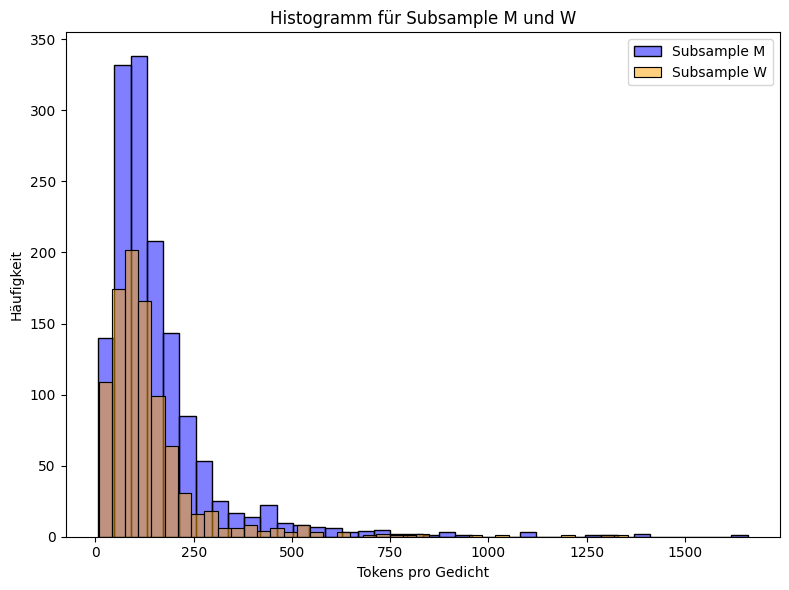

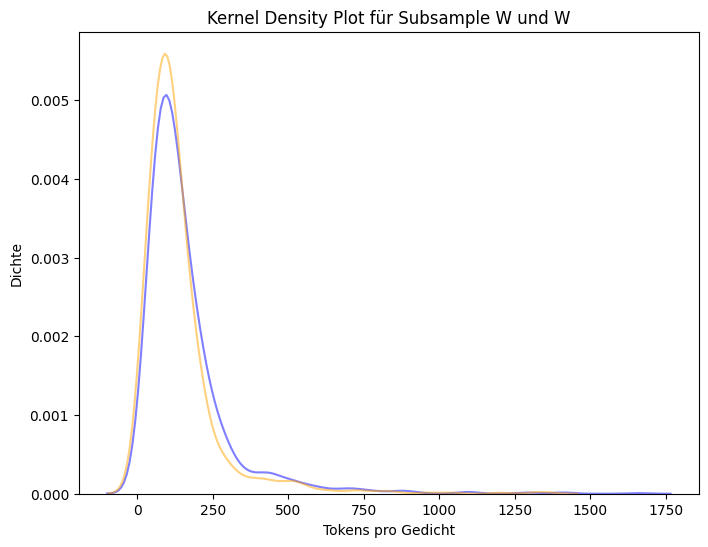

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))

# Histogramm für Subsample M
sns.histplot(poem_lengths_m, kde=False, color='blue', alpha=0.5, label='Subsample M', bins=40, ax=ax)
# Histogramm für Subsample W
sns.histplot(poem_lengths_w, kde=False, color='orange', alpha=0.5, label='Subsample W', bins=40, ax=ax)

plt.title('Histogramm für Subsample M und W')
plt.xlabel('Tokens pro Gedicht')
plt.ylabel('Häufigkeit')
plt.tight_layout()
plt.legend()
plt.show()


fig, ax = plt.subplots(figsize=(8, 6))
# Kernel Density Plot für Subsample M
sns.kdeplot(poem_lengths_m, color='blue', alpha=0.5, label='Subsample M')
# Kernel Density Plot für Subsample W
sns.kdeplot(poem_lengths_w, color='orange', alpha=0.5, label='Subsample W')

plt.title('Kernel Density Plot für Subsample W und W')
plt.xlabel('Tokens pro Gedicht')
plt.ylabel('Dichte')
plt.show()

## Versuch: t-Test
- Begründung: eine unschöne, aber mögliche Option, weil t-Test relativ robust ist (siehe Stefanowitsch, Kap. 6, S. 197)

In [31]:
# Signifikanztest (t-Test)
t_statistic, p_value = ttest_ind(poem_lengths_m, poem_lengths_w)

# Berechne die Degrees of Freedom (Freiheitsgrade)
# Degrees of Freedom = (Anzahl der Beobachtungen in Sample 1) + (Anzahl der Beobachtungen in Sample 2) - 2
sample_size_m = len(poem_lengths_m)
sample_size_w = len(poem_lengths_w)
degrees_of_freedom = sample_size_m + sample_size_w - 2

print("Ergebnisse des t-Tests:")
print("t-Statistik:", t_statistic)
print("p-Wert:", p_value)
print("Freiheitsgrad:", degrees_of_freedom)

if p_value > 0.05:
    print("Es gibt keinen signifikanten Unterschied zwischen den Subsamples.")
else:
    print("Es gibt einen signifikanten Unterschied zwischen den Subsamples.")
    
print(f"(t({degrees_of_freedom}) = {round(t_statistic, 3)}, p > 0.05)")

Ergebnisse des t-Tests:
t-Statistik: 3.4911815187172945
p-Wert: 0.0004896710926744281
Freiheitsgrad: 2373
Es gibt einen signifikanten Unterschied zwischen den Subsamples.
(t(2373) = 3.491, p > 0.05)


- Test scheitert nicht, Voraussetzungen dafür sind aber eigentlich nicht gegeben
- Ergebnis: **&rarr; Nullhypothese kann nicht abgelehnt werden.**

## &rarr; **Mann-Whitney-U-Test** (= Test für Ordinaldaten)
- Ausweichmöglichkeit, wenn t-Test wegen nicht normalverteilten Daten nicht sinnvoll ist (siehe Stefanowitsch, Kap. 6, S. 198)

In [32]:
# Durchführung des Mann-Whitney-U-Tests
u_statistic, p_value = mannwhitneyu(poem_lengths_m, poem_lengths_w, alternative='two-sided')

# Ausgabe der Ergebnisse
print("Mann-Whitney-U-Test:")
print("U-Statistik:", u_statistic)
print("p-Wert:", p_value)

if p_value > 0.05:
    print("Es gibt keinen signifikanten Unterschied zwischen den Subsamples.")
else:
    print("Es gibt einen signifikanten Unterschied zwischen den Subsamples.")

print(f"(U = {u_statistic}, N1 = {sample_size_m}, N2 = {sample_size_w}, p < 0.05)")

Mann-Whitney-U-Test:
U-Statistik: 749078.5
p-Wert: 4.253005674569487e-06
Es gibt einen signifikanten Unterschied zwischen den Subsamples.
(U = 749078.5, N1 = 1437, N2 = 938, p < 0.05)


**&rarr; Unterschied zwischen Gedichtlänge in den zwei Teilkorpora für Frauen und Männer ist signifikant!**

- p-Wert ist liegt unter 0.05
- *In unserem Korpus gibt es zwischen den beiden Teilkorpora für Gedichte von Männern und Frauen einen signifikanten Unterschied hinsichtlich der Gesamtlänge der Gedichte in Tokens. Der Mann-Whitney-U-Test ergab, dass es die Gedichte der Männer im Korpus signifikant länger sind, als die der Frauen.*

Berechnung der **Effektstärke**

- Effektstärke Cramer's V liegt zwischen 0 und 1
- stärker, desto näher an 1 liegt; stärkerer Unterschied zwischen den Subsamples
- 0.76 = stark

In [33]:
# Berechne die Effektstärke für Mann-Whitney-U-Test (Cramer's V)
n1 = len(poem_lengths_m)
n2 = len(poem_lengths_w)
effect_size = np.sqrt(u_statistic / (n1 * n2))

print("Effektstärke (Cramer's V):", effect_size)

Effektstärke (Cramer's V): 0.7454763374173716


5. Visualisierung

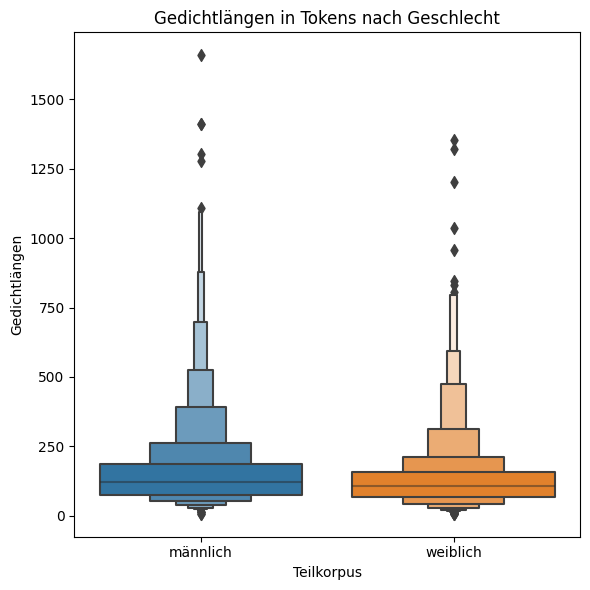

In [34]:
# Zusammenführen der Daten in einem DataFrame für seaborn
import pandas as pd
data = pd.DataFrame({
    "Geschlecht": ["männlich"] * sample_size_m + ["weiblich"] * sample_size_w,
    "Durchschnittliche Verslänge": poem_lengths_m + poem_lengths_w
})

# Boxplot erstellen
fig, ax = plt.subplots(figsize=(6, 6))
sns.boxenplot(x="Geschlecht", y="Durchschnittliche Verslänge", data=data, ax=ax)

# Label und Titel bestimmen
plt.xlabel("Teilkorpus")
plt.ylabel("Gedichtlängen")
plt.title("Gedichtlängen in Tokens nach Geschlecht")


# Plot anzeigen
plt.tight_layout()
plt.show()

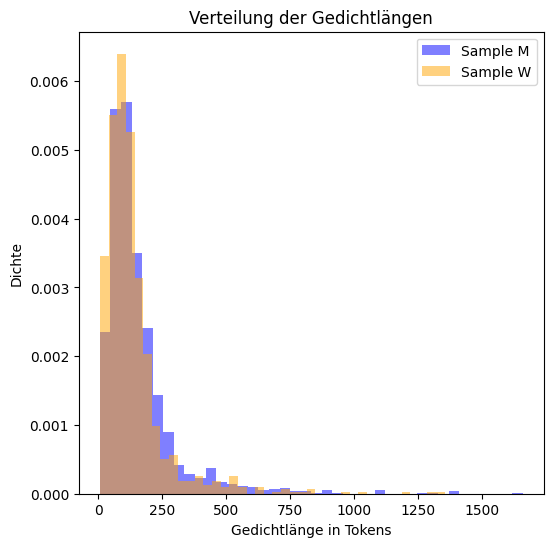

In [35]:
# Erstelle eine Figure und Axes-Objekte
fig, ax = plt.subplots(figsize=(6, 6))

# Plotten der Histogramme für beide Subsamples
ax.hist(poem_lengths_m, bins=40, alpha=0.5, label='Sample M', color='blue', density=True)
ax.hist(poem_lengths_w, bins=40, alpha=0.5, label='Sample W', color='orange', density=True)

# Hinzufügen von Labels und Titeln
ax.set_xlabel('Gedichtlänge in Tokens')
ax.set_ylabel('Dichte')
ax.set_title('Verteilung der Gedichtlängen')

# Legende anzeigen
ax.legend()

# Anzeigen der Grafik
plt.show()